# Case Study 2
-  Diving deeper into pandas, numpy and matplotlib to analyze fuel economy data for different car models from 2008 and 2018
- The fuel economy of an automobile is the fuel efficiency relationship between the distance travelled and the amount of fuel consumed by the vehicle. Consumption can be expressed in terms of volume of fuel to travel a distance or the distance travelled per unit volume of the fuel consumed

## Data Overview
- There are probably a few features in the datasets that dont make sense to you
- Before analyzing the datasets, take some time to understand this data and how it was collected
- [Documentation](https://www.fueleconomy.gov/feg/download.shtml)

In [19]:
import pandas as pd
df_08 = pd.read_csv("fuel-economy-datasets/all_alpha_08.csv")
df_18 = pd.read_csv("fuel-economy-datasets/all_alpha_18.csv")

In [20]:
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [21]:
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


## Asking Questions
- __Relevant Questions to Ask about this data__
1. Are more models using alternative sources of fuel? By how much?
2. How much have vehicle classes improved in fuel economy?
3. What are the characteristics of smartWay vehicles?
4. What features are associated with better fuel economy?
5. For all the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

## Accessing Data

In [24]:
# samples for 2008 data set
df_08.shape

(2404, 18)

In [25]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [26]:
# duplicated rows
df_08.duplicated().sum()

25

In [41]:
# rows with missing data
df_08.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [29]:
# number of non null unique values
df_08['SmartWay'].nunique()

2

In [30]:
# sales area
df_08['Sales Area'].nunique()

3

In [31]:
# Trans
df_08['Trans'].nunique()

14

In [32]:
df_08.isnull().shape[0]

2404

In [34]:
# samples for 2018 data set
df_18.shape

(1611, 18)

In [36]:
# duplicate rows
df_18.duplicated().sum()

0

In [37]:
# rows with missing data
df_18.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

In [38]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

In [39]:
# number of non null uniques values
df_18['SmartWay'].nunique()

3

In [40]:
# Cert Region
df_18['Cert Region'].nunique()

2

In [41]:
# listing all fuel types
df_18['Fuel'].unique()

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas',
       'Electricity'], dtype=object)

In [42]:
df_08['Fuel'].unique()

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

## Cleaning Column Labels
1. __Drop extraneous columns__
- Drop features that aren't consistent(not present in both datasets) or that aren't relevant to our questions
- Use `pandas drop` function

2. __Rename columns__
- Change the "Sales Area" column in 2008 to "Cert Region" for consistency
- Rename all column labels to replace spaces with underscores and convert everything to lowercase
- Underscores are much easier to work with in python spaces, having spaces wouldn't allow you to use `df.column_name` instead of `df['column_name']` to select columns or use `query()`

In [43]:
# Drop extraneous columns on 2008 data set
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


In [44]:
# Drop extraneous columns on 2018 data set
df_18.drop(columns=['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], inplace=True)
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,small SUV,3,19,27,22,4,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,23,33,27,6,No


In [45]:
# Renaming Sales Area to Cert Region
df_08.rename(columns={"Sales Area": "Cert Region"}, inplace=True)
# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [49]:
# replaces spaces with underscores and lowercase labels for 2008 dataset
df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
# confirm changes
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [50]:
# replaces spaces with underscores and lowrcase labels for 2018 dataset
df_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [51]:
# confirm column labels for both 2008 and 2018 are identical
df_08.columns == df_18.columns  #returns True

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [52]:
# making sure they are all identical
(df_08.columns == df_18.columns).all() #returns True

True

In [53]:
# save new datasets for the next session
df_08.to_csv("fuel-economy-datasets/all_alpha_08_clean.csv", index=False)
df_18.to_csv("fuel-economy-datasets/all_alpha_18_clean.csv", index=False)

## Filter, Drop nulls, Dedupe
1. __Filter__
- For consistency only compare cars certified by California standards
- Filter both datasets using `query` to select only rows where `cert region` is `CA`
- Then drop the cert region columns since it will no longer provide any useful information (we'll know value is CA)

2. __Drop Nulls__
- Drop any rows in both datasets that contain missing values

3. __Dedupe__
- Drop any duplicate rows in both datasets

### Filter

In [25]:
# loading data sets
import pandas as pd

df_c_08 = pd.read_csv("fuel-economy-datasets/all_alpha_08_clean.csv")
df_c_18 = pd.read_csv("fuel-economy-datasets/all_alpha_18_clean.csv")

In [26]:
# dimensions of datasets
df_c_08.shape, df_c_18.shape


((2404, 14), (1611, 14))

In [27]:
df_c_18['cert_region'].unique()

array(['FA', 'CA'], dtype=object)

In [28]:
# filter datasets for rows following California standards
df_c_08 = df_c_08.query('cert_region == "CA"')
df_c_18 = df_c_18.query('cert_region == "CA"')

In [29]:
# confirm only certification region is California
df_c_08['cert_region'].unique()

array(['CA'], dtype=object)

In [30]:
# drop certification region columns form both datasets
df_c_08.drop('cert_region', axis=1, inplace=True)
df_c_18.drop('cert_region', axis=1, inplace=True)

In [31]:
df_c_08.shape, df_c_18.shape


((1084, 13), (798, 13))

### Dropping Rows With Missing Values

In [32]:
# missing value count for each feature in 2008
df_c_08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [10]:
# missing value count for each feature in 2018
df_c_18.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [33]:
# drop rows with null values in all data sets
df_c_08.dropna(inplace=True)
df_c_18.dropna(inplace=True)

In [34]:
# checking if any of the columns in both data sets have null values
df_c_08.isnull().sum().any(), df_c_18.isnull().sum().any()

(False, False)

### Dedupe

In [35]:
# printing number of duplicates
print(df_c_08.duplicated().sum())
print(df_c_18.duplicated().sum())

23
3


In [36]:
# drop duplicates in both datasets
df_c_08.drop_duplicates(inplace=True)
df_c_18.drop_duplicates(inplace=True)

In [37]:
# confirming number of duplicates
print(df_c_08.duplicated().sum())
print(df_c_18.duplicated().sum())

0
0


## Inspecting data types

In [38]:
# saving data sets
df_c_08.to_csv("fuel-economy-datasets/data_08_v2.csv", index=False)
df_c_18.to_csv("fuel-economy-datasets/data_18_v2.csv", index=False)

In [39]:
# loading datasets
import pandas as pd
data_08_v2 = pd.read_csv("fuel-economy-datasets/data_08_v2.csv")
data_18_v2 = pd.read_csv("fuel-economy-datasets/data_18_v2.csv")

In [40]:
data_08_v2.dtypes

model                    object
displ                   float64
cyl                      object
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [41]:
data_18_v2.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [42]:
print(data_08_v2.cyl.dtype)
print(data_18_v2.cyl.dtype)

object
float64


In [43]:
data_08_v2.cyl.unique()

array(['(6 cyl)', '(4 cyl)', '(12 cyl)', '(8 cyl)', '(10 cyl)',
       '(16 cyl)', '(5 cyl)', '(2 cyl)'], dtype=object)

__solutions__
1. * cyl
   - Extract int values from the strings in the 2008 cyl column
   - Convert floats to int in the 2018 cyl column
2. * Air pollution score
   - Convert strings to floats in the 2008 column
   - Convert ints to floats in the 2018 column
3. Converting the mpg features in both datasets to floats from strings
4. * greenhouse_gas_store
   - Convert strings to ints in the 2008 column

## Fixing Data Types
__Fixing the cyl data type__

In [44]:
# checking value counts for cyl in the 2008 dataset
data_08_v2.cyl.value_counts()


(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [45]:
# extracting ints from strings
data_08_v2['cyl'] = data_08_v2['cyl'].str.extract('(\d+)').astype(int)

In [46]:
# check value counts again to confirm the change
data_08_v2.cyl.value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [47]:
# convert 2018 column to ints
data_18_v2['cyl'] = data_18_v2['cyl'].astype(int)

__Fixing air pollution score data type__

In [91]:
# load data sets

df_08 = pd.read_csv('fuel-economy-datasets/data_08_v3.csv')
df_18 = pd.read_csv('fuel-economy-datasets/data_18_v3.csv')

In [92]:
df_08.air_pollution_score.value_counts()

6      500
7      398
9.5     80
9        7
6/4      1
Name: air_pollution_score, dtype: int64

In [50]:
# try using Pandas to_numeric or astype function to convert the
# 2008 air_pollution_score column to float -- this won't work
data_08_v2.air_pollution_score = data_08_v2.air_pollution_score.astype(float)

ValueError: could not convert string to float: '6/4'

### Figuring out the issue

In [93]:
# According to the error above the value in the row is "6/4"
df_08[df_08['air_pollution_score'] == '6/4']
# df_08[df_08.air_pollution_score == '6/4']


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation:

    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
    
Ohh.. so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. This is a little tricky, so I'm going to show you how to do it with the 2008 dataset, and then you'll try it with the 2018 dataset.

In [95]:
# getting all the hybrids in 2008
hb_08 = df_08[df_08.fuel.str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


#### Splitting the hybrid rows into two new rows
- One with values for the first fuel types and the other with values for the second fuel types
- Lets separate them with two dataframes

In [96]:
# creating two copies of the 2008 hybrid dataframes
df1 = hb_08.copy()
df2 = hb_08.copy()

# Each one should look like this
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [97]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# applying split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])


In [98]:
# values before "/"
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [99]:
# values after "/"
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [100]:
# combining the data frames to add to the original data frames
new_rows = pd.concat([df1, df2])
# new_rows = df1.append(df2)
new_rows


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [101]:
# drop the original hybrid rows and add the newly separated rows
print(hb_08.index)
df_08.drop(hb_08.index, inplace=True)
df_08 = df_08.append(new_rows, ignore_index=True)


Int64Index([582], dtype='int64')


/tmp/ipykernel_382589/3243048083.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_08 = df_08.append(new_rows, ignore_index=True)


In [102]:
# confirm that the original hybrid rows are gone
df_08[df_08.fuel.str.contains("/")]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [103]:
df_08.shape

(987, 13)

### Repeating this process for the 2018 dataset

In [104]:
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
195,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
196,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
197,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
212,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
214,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


In [112]:
# creating the two datasets for the 2018 hybrid dataframes
df1 = hb_18.copy()
df2 = hb_18.copy()

df2.head(1)
df1.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes


In [113]:
# list of columns to split
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

for y in split_columns:
    df1[y] = df1[y].apply(lambda x: x.split("/")[0])
    df2[y] = df2[y].apply(lambda x: x.split("/")[1])

In [118]:
df1.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes


In [117]:
df2.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Electricity,small car,3,66,78,71,10,Yes


In [122]:
new_rows = pd.concat([df1, df2])

# drop each hybrid row from the original 2018 dataframe
df_18.drop(hb_18.index, inplace=True)

# append new rows to df_18
df_18 = pd.concat([df_18, new_rows], ignore_index=True)

In [123]:
# confirming that they are gone
df_18[df_18['fuel'].str.contains("/")]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [124]:
df_18.shape

(832, 13)

### Now we can comfortably complete the cahnges needed for `air pollution score`

In [130]:
# 2008 dataset
print(df_08.air_pollution_score.dtype)
df_08.air_pollution_score.value_counts()

object


6      501
7      398
9.5     80
9        7
4        1
Name: air_pollution_score, dtype: int64

In [131]:
# converting the stirng to float
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)

In [133]:
# 2018 data set
print(df_18.air_pollution_score.dtype)
df_18.air_pollution_score.value_counts()

int64


3    393
5    196
7    146
1     90
6      7
Name: air_pollution_score, dtype: int64

In [135]:
# converting int in 2018 data set to float
df_18.air_pollution_score = df_18.air_pollution_score.astype(float)
print(df_18.air_pollution_score.dtype)


float64


In [137]:
# saving the data sets
df_08.to_csv("fuel-economy-datasets/data_08_v4.csv", index=False)
df_18.to_csv("fuel-economy-datasets/data_18_v4.csv", index=False)

## Fixing data types for columns in `mpg` and `green_house_gas_store`

In [138]:
# load datasets
import pandas as pd

df_08 = pd.read_csv("fuel-economy-datasets/data_08_v4.csv")
df_18 = pd.read_csv("fuel-economy-datasets/data_18_v4.csv")

In [139]:
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for x in mpg_columns:
    df_08[x] = df_08[x].astype(float)
    df_18[x] = df_18[x].astype(float)

#### Fixing green house gas store data type

In [140]:
# convert from float to int
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(int)

### All data types are now fixed

In [147]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [142]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [148]:
# saving final CLEAN datasets as new files
df_08.to_csv("fuel-economy-datasets/clean_08.csv", index=False)
df_18.to_csv("fuel-economy-datasets/clean_18.csv", index=False)

## Exploring with visuals

In [149]:
# loading datasets
import pandas as pd
df_08 = pd.read_csv("fuel-economy-datasets/clean_08.csv")
df_18 = pd.read_csv("fuel-economy-datasets/clean_18.csv")

In [150]:
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [151]:
df_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No


### compare the distribution of green house gas score in both data sets

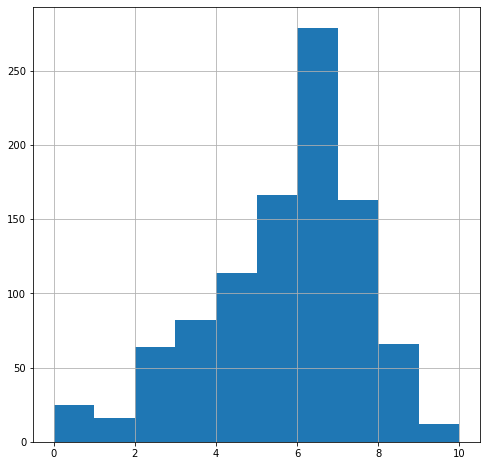

In [156]:
df_08.greenhouse_gas_score.hist(figsize=(8,8));

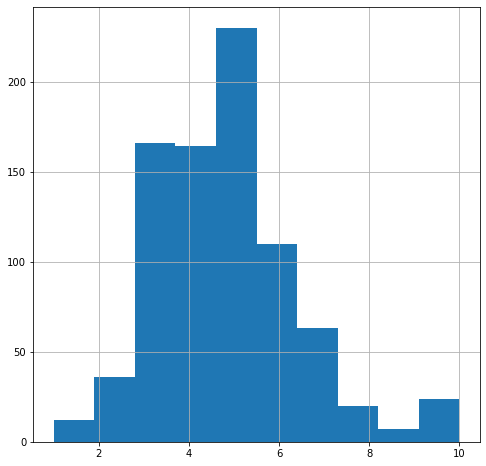

In [159]:
df_18.greenhouse_gas_score.hist(figsize=(8, 8));

### How has the distribution of combined mpg changed from 2008 to 2018?

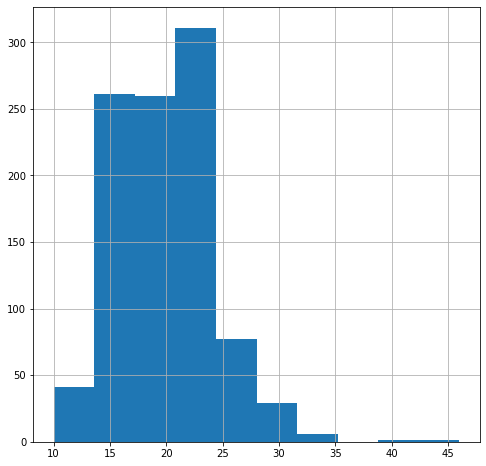

In [167]:
df_08.cmb_mpg.hist(figsize=(8, 8));

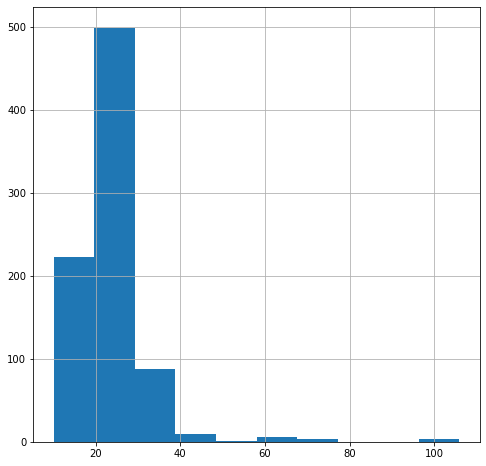

In [164]:
df_18.cmb_mpg.hist(figsize=(8, 8));

### Describe the correlation between displacement and combined mpg.

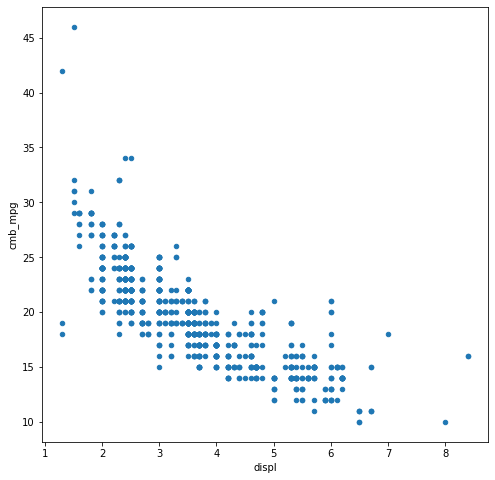

In [171]:
df_08.plot(kind="scatter", x="displ", y="cmb_mpg", figsize=(8, 8));

<AxesSubplot:xlabel='displ', ylabel='cmb_mpg'>

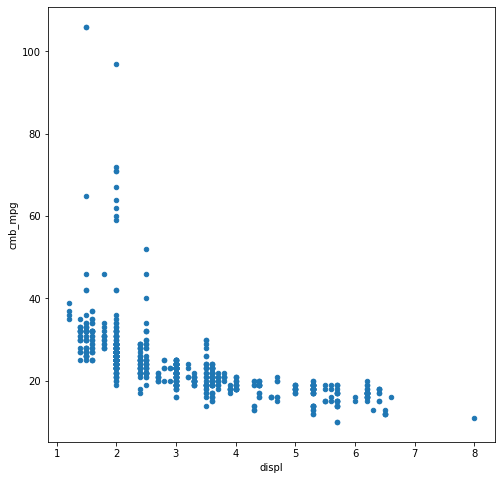

In [172]:
df_18.plot(kind="scatter", x="displ", y="cmb_mpg", figsize=(8, 8))

### Describe the correlation between greenhouse gas score and combined mpg.

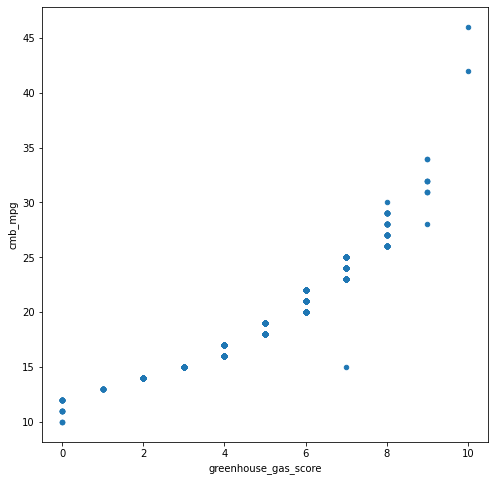

In [175]:
df_08.plot(kind="scatter", x="greenhouse_gas_score", y="cmb_mpg", figsize=(8, 8));

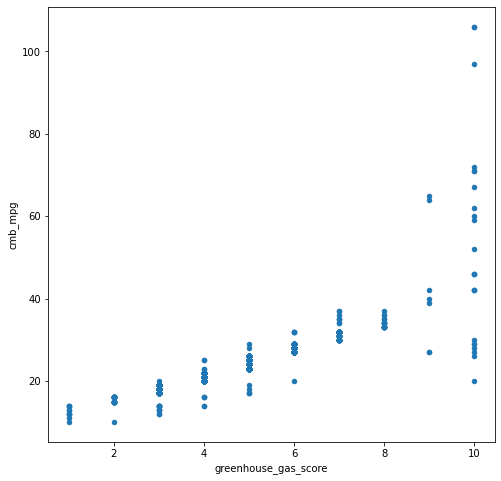

In [177]:
df_18.plot(kind="scatter", x="greenhouse_gas_score", y="cmb_mpg", figsize=(8, 8));


## Conclusions and Visuals

In [190]:
# load datasets
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_08 = pd.read_csv("fuel-economy-datasets/clean_08.csv")
df_18 = pd.read_csv("fuel-economy-datasets/clean_18.csv")

## Q1. Are more unique models alternative sources of fuel? By how much?

In [180]:
# Looking at the sources of fuel to find out the alternative ones
df_08.fuel.value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [181]:
df_18.fuel.value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

- 2008 - __CNG and Ethanol__
- 2018 - __Ethanol and Electricity__

In [188]:
# hw many unique models used alternative sources of fuel in 2008
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [189]:
# How many unique models used alternative sources of fuel in 2018
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

Text(0, 0.5, 'Number of unique models')

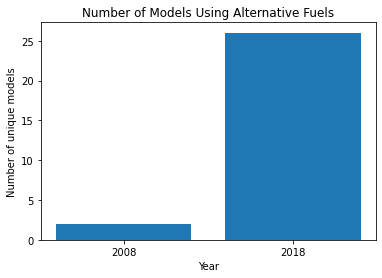

In [193]:
plt.bar(["2008", "2018"], [alt_08, alt_18])
plt.title("Number of Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of unique models")

- Since 2008 the number of alternative models using fuel has increased by 24

In [199]:

# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18


(377, 357)

In [200]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

Text(0, 0.5, 'Proportion of Unique Models')

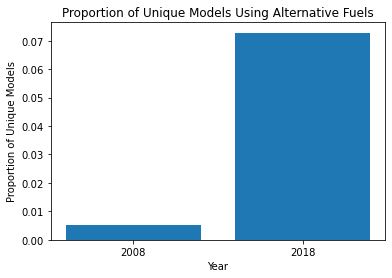

In [201]:
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models")

## Q2. How much have vehicle classes improved in fuel economy?

In [203]:
df_08.veh_class.value_counts()

small car        333
SUV              280
midsize car      138
pickup            83
station wagon     60
large car         55
van               21
minivan           17
Name: veh_class, dtype: int64

In [205]:
df_18.veh_class.value_counts()

small car          285
midsize car        138
small SUV          108
large car           88
standard SUV        86
pickup              78
station wagon       34
special purpose     10
minivan              5
Name: veh_class, dtype: int64

#### Average fuel economy for each vehicle class in both years

In [207]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [209]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [211]:
# increase for each vehicle class
inc = veh_18 -veh_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

veh_class
large car        4.900000
midsize car      6.282609
minivan          1.682353
pickup           2.312635
small car        4.315948
station wagon    5.162745
Name: cmb_mpg, dtype: float64
Index(['large car', 'midsize car', 'minivan', 'pickup', 'small car',
       'station wagon'],
      dtype='object', name='veh_class')


Text(0, 0.5, 'Increase in Average Combined MPG')

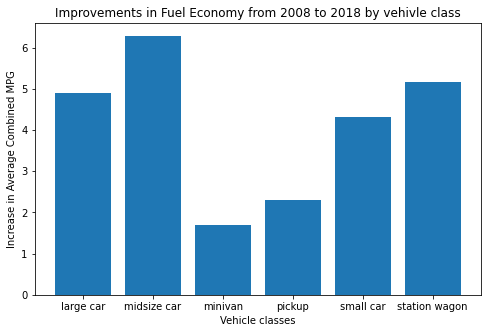

In [218]:
# plotting the classes that exist in both years
inc.dropna(inplace=True)
print(inc)
print(inc.index)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title("Improvements in Fuel Economy from 2008 to 2018 by vehivle class")
plt.xlabel("Vehicle classes")
plt.ylabel("Increase in Average Combined MPG")

## Q3. What are the characteristics of smartWay vehicles? Have they changed overtime

In [220]:
# We can analyze this by filtering each dataframe by smartWay classification and exploring the datasets
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [222]:
# get all smartway vehicles in 2008
smart_08 = df_08.query('smartway == "yes"')

In [223]:
# exploring the smartway vehicles in 2008
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [226]:
# smartway labels for 2018
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [232]:
# get all smartway vehicles in 2018
smart_18 = df_18.query('smartway in ["Yes", "Elite"]')

In [230]:
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,1.753846,3.923077,4.879121,31.483516,39.296703,34.439560,7.538462
std,0.420399,0.452911,1.769087,11.239180,9.410980,10.214596,0.860332
min,1.200000,3.000000,3.000000,25.000000,27.000000,27.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.600000,4.000000,5.000000,28.000000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,30.000000,40.000000,34.000000,8.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


## Q4. What features are associated with better fuel economy?

In [236]:
# you can explore trends between cmb_mpg and other features in this dataset or filter the datasets and explore the properties of that dataset
# For example you can select all vehicles that have the top 50% fuel_economy ratings like this;
top_08 = df_08.query('cmb_mpg >= cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [238]:
top_18 = df_18.query('cmb_mpg < cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,3.802579,6.444444,3.412698,17.363095,24.277778,19.876984,3.722222
std,1.271141,1.621454,1.540803,2.762484,3.635782,2.996477,1.041019
min,2.000000,4.000000,1.000000,9.000000,12.000000,10.000000,1.000000
25%,3.000000,6.000000,3.000000,16.000000,22.000000,18.000000,3.000000
50%,3.600000,6.000000,3.000000,18.000000,25.000000,20.000000,4.000000
75%,5.000000,8.000000,5.000000,20.000000,27.000000,22.000000,5.000000
max,8.000000,16.000000,7.000000,22.000000,32.000000,24.000000,10.000000


## Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?
- This is a question regarding models that were updated since 2008 and still being produced in 2018. In order to do this, we need a way to compare models that exist in both datasets. To do this, let's first learn about merges.